# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

## Note: I used virtual environment to do this assignment because my python 3.11 could not install scikit-surprise but i really want to try it. 

In [3]:
#pip install seaborn

In [4]:
# import pandas and import in my csv files: rating and movies datasets
import pandas as pd
ratings = pd.read_csv('/Users/johnxie301/Desktop/Data_Science_600/Assignment_6/ratings.csv')
movies = pd.read_csv('/Users/johnxie301/Desktop/Data_Science_600/Assignment_6/movies.csv')


In [5]:
# a quick view of movies table
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#a qucik view of ratings table
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# convert the timestamp from numbers to datetime format
time_in_time = pd.to_datetime(ratings['timestamp'], unit = 's')


In [8]:
#use groupby attribute to get number of movies user 2 have watched
user_2_r = ratings[ratings['userId']==2]
user_2_r.groupby('userId').movieId.count()

userId
2    29
Name: movieId, dtype: int64

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

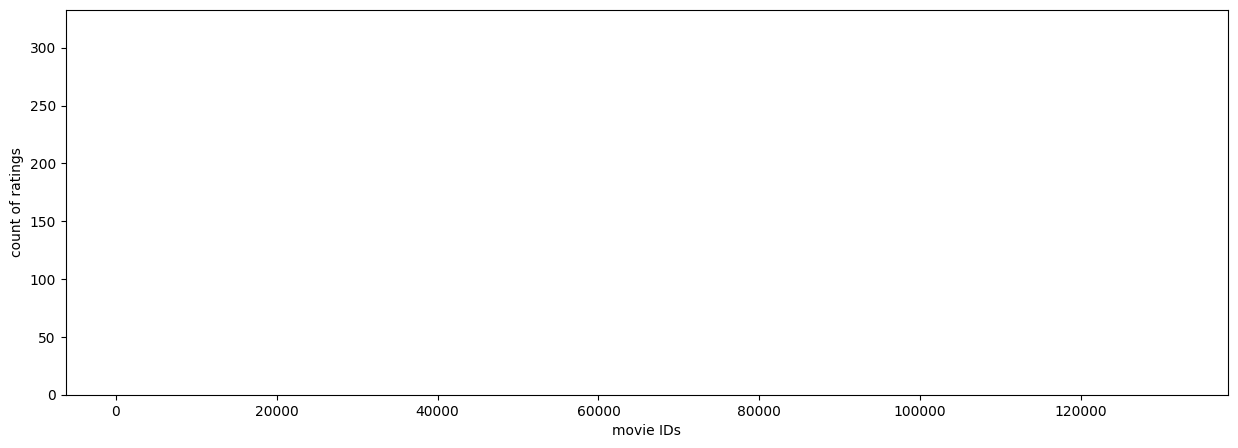

In [10]:

# I planned to create a box plot using pyplot. However, I have tried many different ways, the values does not show up.
movie_r = ratings[ratings['movieId'].isin(user_2_r['movieId'])]
movie_r.head()
count_mr = movie_r.groupby(['movieId'],as_index= False).rating.count()
count_mr
fig = plt.figure(figsize = (15, 5))
plt.bar(count_mr['movieId'],count_mr['rating'],width=0.4)
plt.xlabel('movie IDs')
plt.ylabel('count of ratings')
plt.show()



<Axes: xlabel='movieId'>

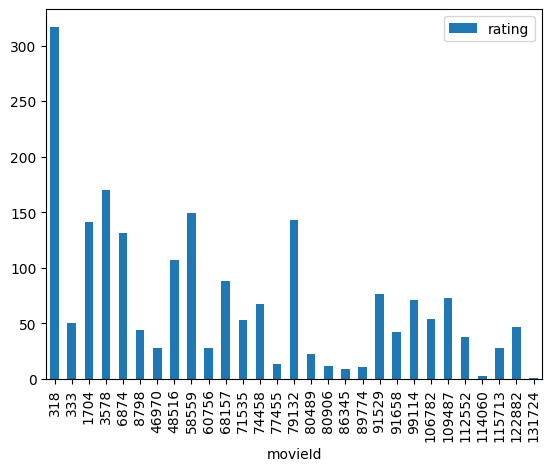

In [41]:
count_mr.sort_index().plot(x='movieId',y='rating',kind='bar')

<Axes: xlabel='movieId'>

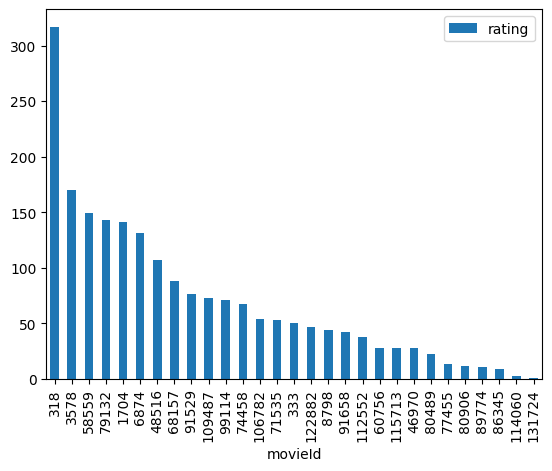

In [11]:
# So I created a bar plot using pandas, I would like to see the most rated movie from user2's collection so I sorted by values instead
count_mr.sort_values(by = 'rating',ascending=False).plot(x='movieId',y='rating',kind='bar')

In [12]:
#showing the top 10 movies from user 2's collection
new_user_2_r = user_2_r.merge(right=movies,how='left',on='movieId').sort_values(by='rating',ascending=False)
new_user_2_r[['title','genres','rating']].head(10)

,title,genres,rating
28,The Jinx: The Life and Deaths of Robert Durst ...,Documentary,5.0
27,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,5.0
22,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,5.0
18,Warrior (2011),Drama,5.0
9,Step Brothers (2008),Comedy,5.0
16,Inside Job (2010),Documentary,5.0
2,Good Will Hunting (1997),Drama|Romance,4.5
8,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.5
10,Inglourious Basterds (2009),Action|Drama|War,4.5
15,"Town, The (2010)",Crime|Drama|Thriller,4.5


## Simple Colleborative Filtering Recommander

In [13]:
#create a pivot table for users and movies
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
# find the correlations between users to users
cor = wide.T.corr()
cor.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.000000,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
6,-0.291636,NaN,NaN,0.148498,0.043166,1.000000,-0.126595,-0.200062,NaN,0.957427,...,-2.927700e-01,-2.749519e-02,-0.112141,-0.090297,0.100735,-0.049192,0.255639,0.125428,0.193649,0.115580
7,-0.118773,-0.991241,NaN,0.542861,0.158114,-0.126595,1.000000,0.220416,0.925000,-0.156764,...,-2.804959e-01,1.104315e-01,0.343649,0.560968,0.416186,0.137771,0.402792,0.008081,0.420288,0.341233
8,0.469668,NaN,NaN,0.117851,0.028347,-0.200062,0.220416,1.000000,NaN,-1.000000,...,1.000000e+00,1.909022e-01,0.249252,0.534375,-0.217405,0.253582,0.251280,0.434423,0.141860,0.167931
9,0.918559,NaN,NaN,NaN,NaN,NaN,0.925000,NaN,1.000000,NaN,...,5.773503e-01,NaN,0.376715,NaN,0.158777,0.572700,NaN,0.336625,NaN,0.615638


In [14]:
# look for the most correlated users for user 2
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

In [15]:
# find the movies from user 341 that is rated 5 but not watched by user 2.
rated_5_by_341_not_watched_by_2 = (wide.loc[341] == 5) & (wide.loc[2].isna())
movieId_rec = wide.loc[341][rated_5_by_341_not_watched_by_2].keys()
movie_rec = movies[['title','genres']][movies['movieId'].isin(movieId_rec)]
movie_rec

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6763,You Don't Mess with the Zohan (2008),Comedy


Comment: Using correlation method, I would recommand movies toy story and you don't Mess with the Zohan to user 2. ( Toy Story is one of my favorites too, 5 out of 5!)

## Cosine Distance to Check for Similarities

In [16]:
# import pdist, squareform to get users consine distance(distance of an n-Dimensional matrix which we cannot visualize)
from scipy.spatial.distance import pdist, squareform

In [17]:
wide.fillna(-1, inplace=True)

In [18]:
cosine_distances = squareform(pdist(wide, metric='cosine'))

In [19]:
#Create the date frame of consine distances between each users
cosine_df = pd.DataFrame(data=cosine_distances, columns=wide.index, index=wide.index)
cosine_df.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.297820,0.287596,0.351641,0.284578,0.424172,0.325947,0.283508,0.297012,0.367191,...,0.351630,0.317624,0.604000,0.328982,0.354062,0.704825,0.310711,0.492753,0.284335,0.774839
2,0.297820,0.000000,0.066901,0.239743,0.082261,0.297203,0.166283,0.083310,0.080182,0.151920,...,0.141293,0.158107,0.637488,0.132006,0.214459,0.712016,0.223966,0.534940,0.067643,0.762312
3,0.287596,0.066901,0.000000,0.235964,0.078257,0.296470,0.166386,0.080095,0.075480,0.156956,...,0.163181,0.154612,0.631028,0.127545,0.208735,0.712729,0.218059,0.536596,0.064865,0.780489
4,0.351641,0.239743,0.235964,0.000000,0.226149,0.397426,0.288046,0.239146,0.245999,0.306657,...,0.294808,0.276698,0.539371,0.277381,0.333232,0.669528,0.321761,0.557756,0.233855,0.787540
5,0.284578,0.082261,0.078257,0.226149,0.000000,0.245799,0.164334,0.055515,0.092285,0.167458,...,0.169619,0.107608,0.612848,0.107614,0.198208,0.691993,0.207570,0.513040,0.060947,0.775858


In [20]:
# find the users with closest consine distances.
cosine_df.loc[2].sort_values().head(10)

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
433    0.049446
549    0.049990
293    0.050542
431    0.051462
366    0.051482
Name: 2, dtype: float64

In [21]:
wide.loc[2].isna().equals(wide.loc[442].isna())

True

In [22]:
wide.loc[2]

movieId
1        -1.0
2        -1.0
3        -1.0
4        -1.0
5        -1.0
         ... 
193581   -1.0
193583   -1.0
193585   -1.0
193587   -1.0
193609   -1.0
Name: 2, Length: 9724, dtype: float64

### Comment: After a couple tries, I finally realize there is no way we will have a false for this. Because we changed all the null values to -1.
 

In [23]:
# find the movies from user 461 that is rated 5 but not watched by user 2.
rated_5_by_461_not_watched_by_2 = (wide.loc[461] == 5) & (wide.loc[2] == -1)
movieId_rec_461 = wide.loc[461][rated_5_by_461_not_watched_by_2].keys()
movie_rec_461 = movies[['title','genres']][movies['movieId'].isin(movieId_rec_461)]
movie_rec_461


,title,genres
314,Forrest Gump (1994),Comedy|Drama|Romance|War


In [24]:
# find the movies from user 433 that is rated 5 but not watched by user 2.
rated_5_by_433_not_watched_by_2 = (wide.loc[433] == 5) & (wide.loc[2] == -1)
movieId_rec_433 = wide.loc[433][rated_5_by_433_not_watched_by_2].keys()
movie_rec_433 = movies[['title','genres']][movies['movieId'].isin(movieId_rec_433)]
movie_rec_433


,title,genres
46,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
257,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3790,My Big Fat Greek Wedding (2002),Comedy|Romance
9392,Arrival (2016),Sci-Fi


### Comment: Among the 5 users that has the closed consine distance score with user2, only two person have 5 star rating movies user 2 did not watch. So I will recommand 'Forrest Gump', 'Usual Suspects, the', 'Pulp Fiction', 'My Big Fat Greek Wedding' and 'Arrival' to user 2.

## Looking for similar users using Eucliden distance measure

In [25]:
euclidean_distances = squareform(pdist(wide, metric='euclidean'))

In [26]:
#Create the date frame of Eucliden distances between each users(x^2 + y^2 = Z^2)
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)
euclidean_df.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


In [27]:
euclidean_df.loc[2].sort_values().head(10)

userId
2       0.000000
442    29.000000
461    30.495901
189    30.809901
508    31.488093
433    31.610916
549    31.776564
293    31.847292
431    32.148095
245    32.159757
Name: 2, dtype: float64

In [28]:
#pip install scikit-surprise

You should consider upgrading via the '/Users/johnxie301/env/env39/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
from surprise import SVD
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# path to dataset file
file_path = '/Users/johnxie301/Desktop/Data_Science_600/Assignment_6/ratings.csv'

# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

data = Dataset.load_from_file(file_path, reader=reader)

cross_validate(SVD(), data, verbose=True)

#code source: Week_6_FTE.ipynb

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8794  0.8796  0.8737  0.8680  0.8718  0.8745  0.0044  
MAE (testset)     0.6736  0.6751  0.6729  0.6671  0.6732  0.6724  0.0027  
Fit time          0.37    0.37    0.37    0.36    0.36    0.36    0.01    
Test time         0.05    0.05    0.05    0.05    0.05    0.05    0.00    


{'test_rmse': array([0.87937667, 0.87955621, 0.87367164, 0.86804404, 0.87184043]),
 'test_mae': array([0.67360277, 0.67513532, 0.67290546, 0.66712754, 0.67321187]),
 'fit_time': (0.3709101676940918,
  0.3681819438934326,
  0.3675730228424072,
  0.35852503776550293,
  0.35678720474243164),
 'test_time': (0.04664492607116699,
  0.04660511016845703,
  0.0462799072265625,
  0.046946048736572266,
  0.04642176628112793)}

In [36]:
# use the whole dataset as training set. I looked up on chatgpt. This is usually how you train a recommander system
training_data = data.build_full_trainset()
rec = SVD()
fitted = rec.fit(training_data)

#code source: Week_6_FTE.ipynb

In [38]:
# set uid and iid are a user-item type of relationship. uid in this case is userId = 2, iid in this case is rating = 5
prediction = rec.predict(uid='2', iid='5')
prediction
#code source: Week_6_FTE.ipynb

Prediction(uid='2', iid='5', r_ui=None, est=3.152600605217414, details={'was_impossible': False})

In [40]:
# this part is really hard to understand. 
#I think I created a function that runs all the estimations for movie ratings for every user. 
#And then sort the scores by users then by rating estimations from high to low, and returns top 10 estimation results.
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [33]:
# gets predictions for user 2 and give the top 10 movies with best estimated scores for this user.
import pandas as pd
testset = training_data.build_anti_testset()
predictions = rec.test(testset)

top_n = get_top_n(predictions)

top_user_1 = pd.DataFrame(data=top_n['2'], columns=['movieId', 'predicted_rating'])
top_user_1['movieId'] = top_user_1['movieId'].astype('int')
top_user_1.set_index('movieId', inplace=True)

top_user_1.merge(movies, left_index=True, right_index=True)

,predicted_rating,movieId,title,genres
50,4.615441,55,Georgia (1995),Drama
1198,4.534188,1596,Career Girls (1997),Drama
1204,4.526553,1602,Leave It to Beaver (1997),Comedy
2959,4.472750,3967,Billy Elliot (2000),Drama
1276,4.468362,1693,Amistad (1997),Drama|Mystery
1213,4.437964,1612,"Kiss Me, Guido (1997)",Comedy
260,4.419385,300,Quiz Show (1994),Drama
475,4.415505,542,Son in Law (1993),Comedy|Drama|Romance
741,4.395539,968,Night of the Living Dead (1968),Horror|Sci-Fi|Thriller
356,4.377697,412,"Age of Innocence, The (1993)",Drama


Comment: Euclidean and cosine did come up with simliar results. I will not continue doing the recommendation using this method.

### Do the recommendations from these methods make sense?

These methods do make sense to me. By finding the users with most similarities on movies they both have watched, we recommand the rating scores of 5 from people that share same or similar watchlist. The closer in distance, the more similar they are. However, these recommendations only comes from one perspective. I believe surprise does a better job on recommending through many similar users and ratings of movies. I do not know how exactly this works but I was surprised none of the recommended movies from the methods I used previously appeared on the result surprise give to me.

# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

## Summary:
#### This week I tried on some recommendation ananlysis using the ratings dataset and movies dataset. First of all, I did some EDA on user 2 to get a basic understanding of this user. I looked at number of movies he has rated and name and genres of his highest rated movies. Genres appeared most in his top 10 highest rating movies are drama, action,crime and thriller, which really fits some of the movies I recommended. Out of all that, Drama does seem to be his favorite by taking this rough look. 

#### I created pivot table charts of users and movies using rating as value. First I used correlations to get the users most correlatd to user 2 for recommandations. The results are not the same genres user 2 tend to favorite. Then I used cosine distance and Euclidean distance method to find users with most similarties on movies. I picked their 5 point rating movies that user 2 have not watched as recommended movies. These movies does appear to be the genres user 2 rate with a high score. 

#### Last but not least, I tried to use scikit-surprise to train the dataset to get the predicted ratings of every movie for user 2. I then picked the movies from his top 10 predicted ratings. These genres are highly correspond with his top 10 movies genres. That is why I would trust scikit-surprise's method more than the other two ways. In my perspective, consine distance and euclidean distance did do a better job on finding the users with more similarities than correlation.
